In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

C:\Users\ST-0008\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df=pd.read_csv(r"C:\Users\ST-0008\Desktop\brain_stroke.csv")
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [3]:
df.shape

(4981, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [5]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [6]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
df["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children'], dtype=object)

In [8]:
df["gender"].unique()

array(['Male', 'Female'], dtype=object)

In [9]:
df["age"].unique()

array([6.70e+01, 8.00e+01, 4.90e+01, 7.90e+01, 8.10e+01, 7.40e+01,
       6.90e+01, 7.80e+01, 6.10e+01, 5.40e+01, 5.00e+01, 6.40e+01,
       7.50e+01, 6.00e+01, 7.10e+01, 5.20e+01, 8.20e+01, 6.50e+01,
       5.70e+01, 4.20e+01, 4.80e+01, 7.20e+01, 5.80e+01, 7.60e+01,
       3.90e+01, 7.70e+01, 6.30e+01, 7.30e+01, 5.60e+01, 4.50e+01,
       7.00e+01, 5.90e+01, 6.60e+01, 4.30e+01, 6.80e+01, 4.70e+01,
       5.30e+01, 3.80e+01, 5.50e+01, 4.60e+01, 3.20e+01, 5.10e+01,
       1.40e+01, 3.00e+00, 8.00e+00, 3.70e+01, 4.00e+01, 3.50e+01,
       2.00e+01, 4.40e+01, 2.50e+01, 2.70e+01, 2.30e+01, 1.70e+01,
       1.30e+01, 4.00e+00, 1.60e+01, 2.20e+01, 3.00e+01, 2.90e+01,
       1.10e+01, 2.10e+01, 1.80e+01, 3.30e+01, 2.40e+01, 3.60e+01,
       6.40e-01, 3.40e+01, 4.10e+01, 8.80e-01, 5.00e+00, 2.60e+01,
       3.10e+01, 7.00e+00, 1.20e+01, 6.20e+01, 2.00e+00, 9.00e+00,
       1.50e+01, 2.80e+01, 1.00e+01, 1.80e+00, 3.20e-01, 1.08e+00,
       1.90e+01, 6.00e+00, 1.16e+00, 1.00e+00, 1.40e+00, 1.72e

In [10]:
df["heart_disease"].unique()

array([1, 0], dtype=int64)

In [11]:
df["ever_married"].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
df["Residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [13]:
df["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [14]:
df["stroke"].unique()

array([1, 0], dtype=int64)

In [15]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.278120,0.264852,0.236763,0.373703,0.246478
hypertension,0.278120,1.000000,0.111974,0.170028,0.158762,0.131965
heart_disease,0.264852,0.111974,1.000000,0.166847,0.060926,0.134610
avg_glucose_level,0.236763,0.170028,0.166847,1.000000,0.186348,0.133227
bmi,0.373703,0.158762,0.060926,0.186348,1.000000,0.056926
stroke,0.246478,0.131965,0.134610,0.133227,0.056926,1.000000


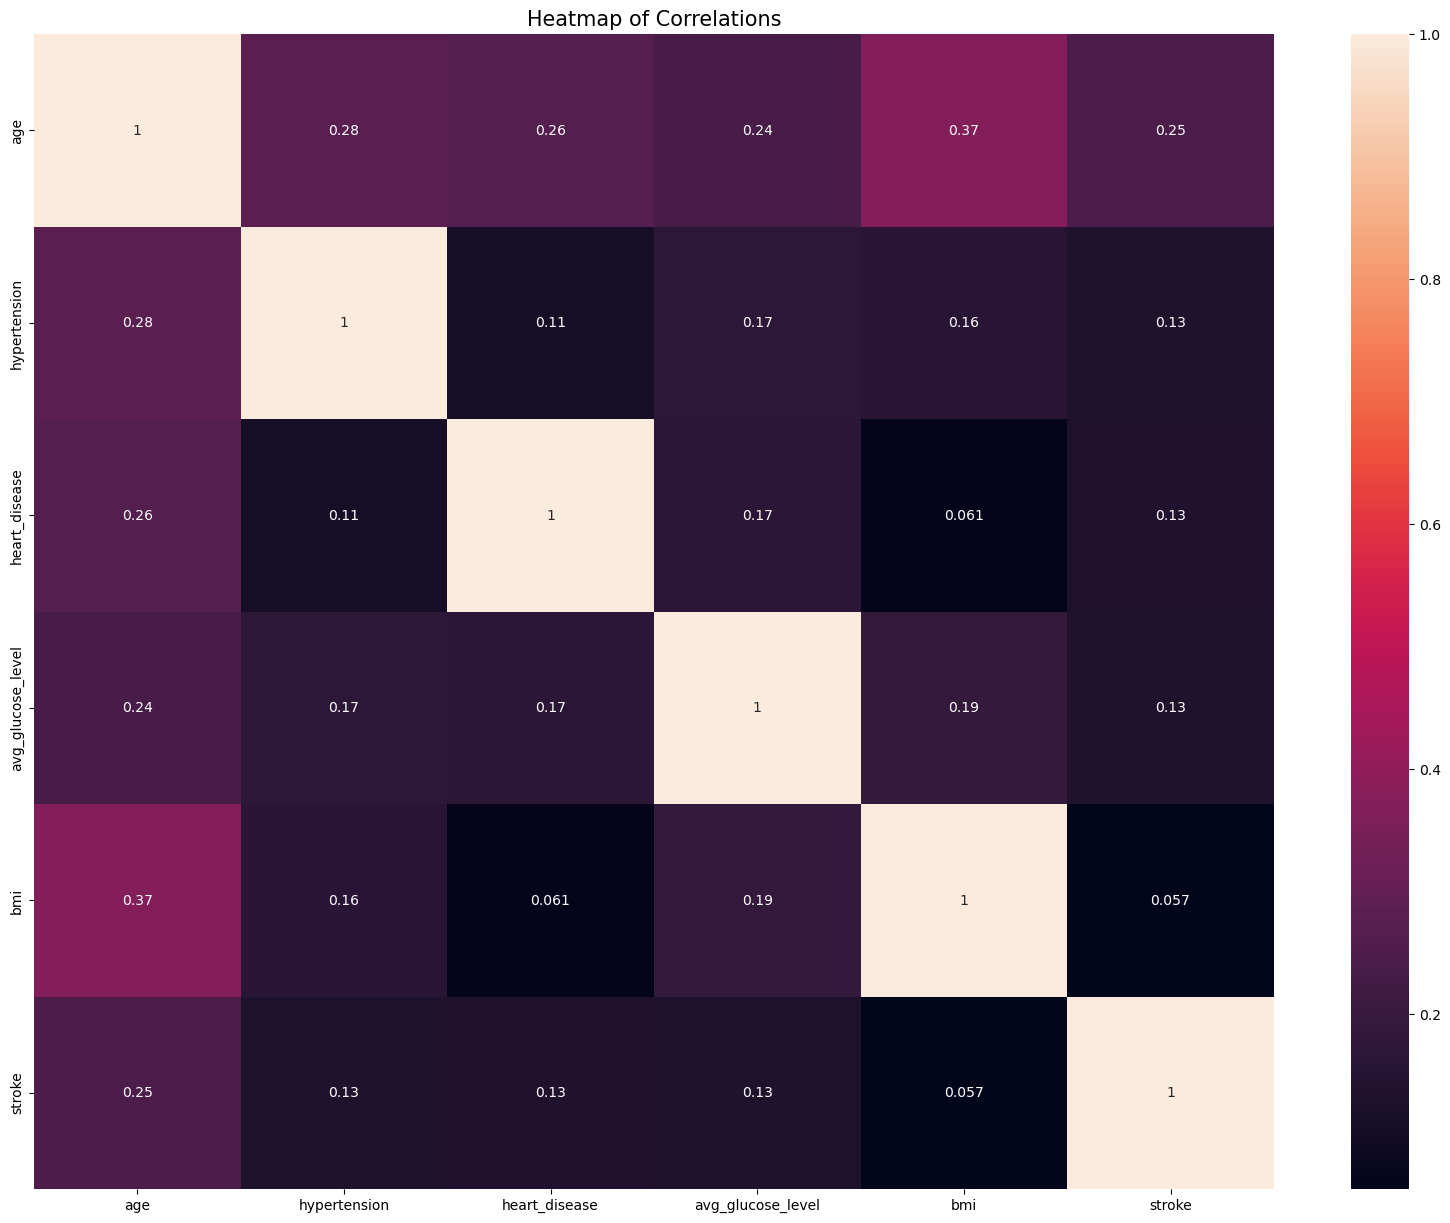

In [16]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap of Correlations',fontsize=15)
plt.show()

In [17]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [18]:
df["age"].value_counts()

78.00    102
57.00     92
54.00     85
51.00     84
79.00     84
        ... 
1.16       3
0.48       3
0.40       2
0.08       2
0.16       1
Name: age, Length: 104, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [20]:
df.shape

(4981, 11)

In [21]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
objList = ['gender','ever_married','work_type','Residence_type','smoking_status']
for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int32  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int32  
 5   work_type          4981 non-null   int32  
 6   Residence_type     4981 non-null   int32  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   int32  
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 330.9 KB
None


In [24]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1,0
4977,1,40.0,0,0,1,1,1,191.15,31.1,3,0
4978,0,45.0,1,0,1,0,0,95.02,31.8,3,0
4979,1,40.0,0,0,1,1,0,83.94,30.0,3,0


0    4733
1     248
Name: stroke, dtype: int64


C:\Users\ST-0008\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


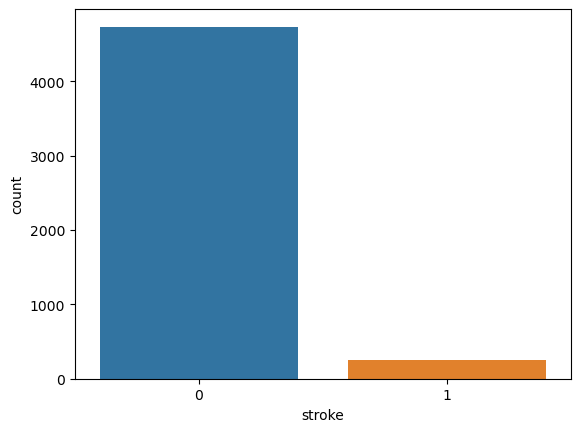

In [25]:
y = df["stroke"]
sns.countplot(y)
target_temp = df.stroke.value_counts()

print(target_temp)

In [26]:
df["stroke"].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [27]:
print("Percentage of patience without stroke problems: "+str(round(target_temp[0]*100/299,2)))
print("Percentage of patience with stroke problem : "+str(round(target_temp[1]*100/299,2)))

Percentage of patience without stroke problems: 1582.94
Percentage of patience with stroke problem : 82.94


In [28]:
df["gender"].unique()

array([1, 0])

C:\Users\ST-0008\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='stroke'>

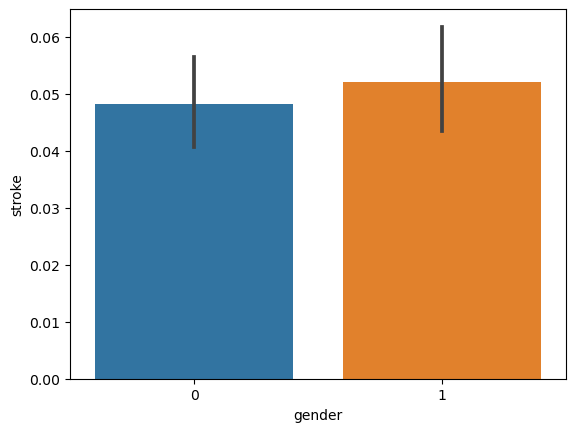

In [29]:
sns.barplot(df["gender"],y)

In [30]:
countFemale = len(df[df.gender == 0])
countMale = len(df[df.gender == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(df.gender))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(df.gender))*100))

Percentage of Female Patients:58.36%
Percentage of Male Patients:41.64%


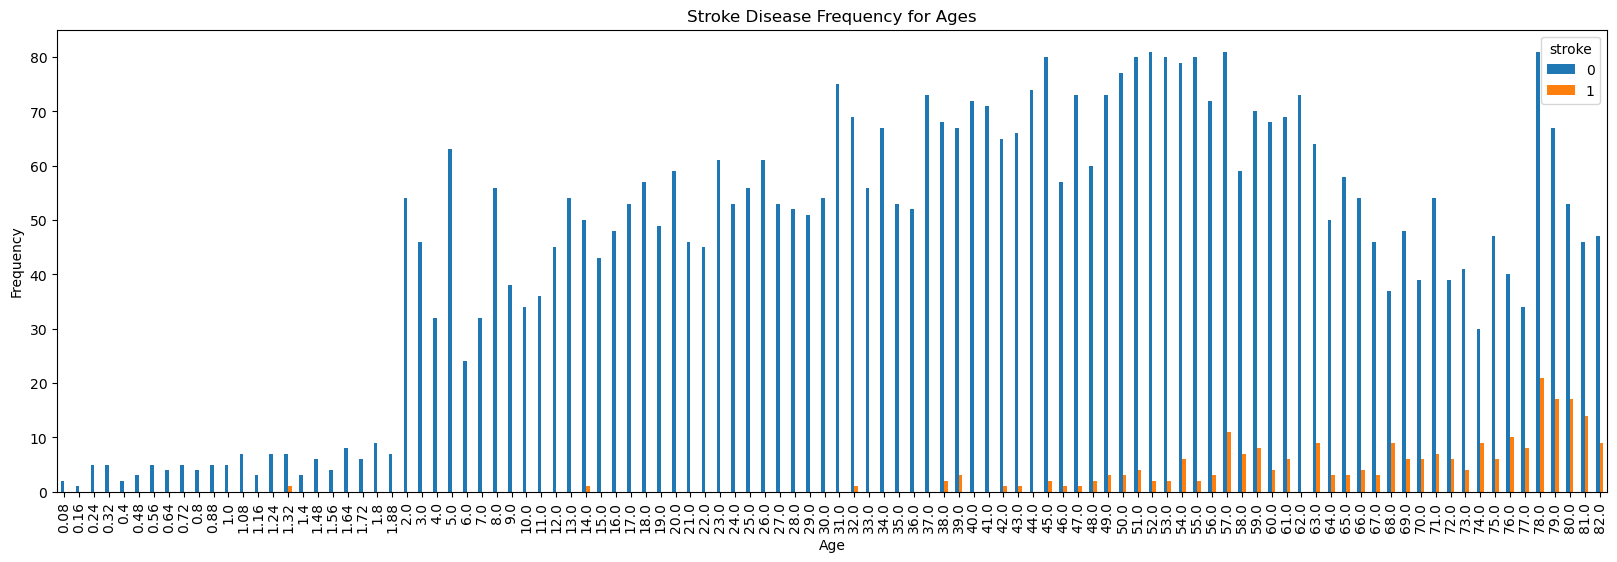

In [31]:
pd.crosstab(df.age,df.stroke).plot(kind="bar",figsize=(20,6))
plt.title('Stroke Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('StrokeDiseaseAndAges.png')
plt.show()

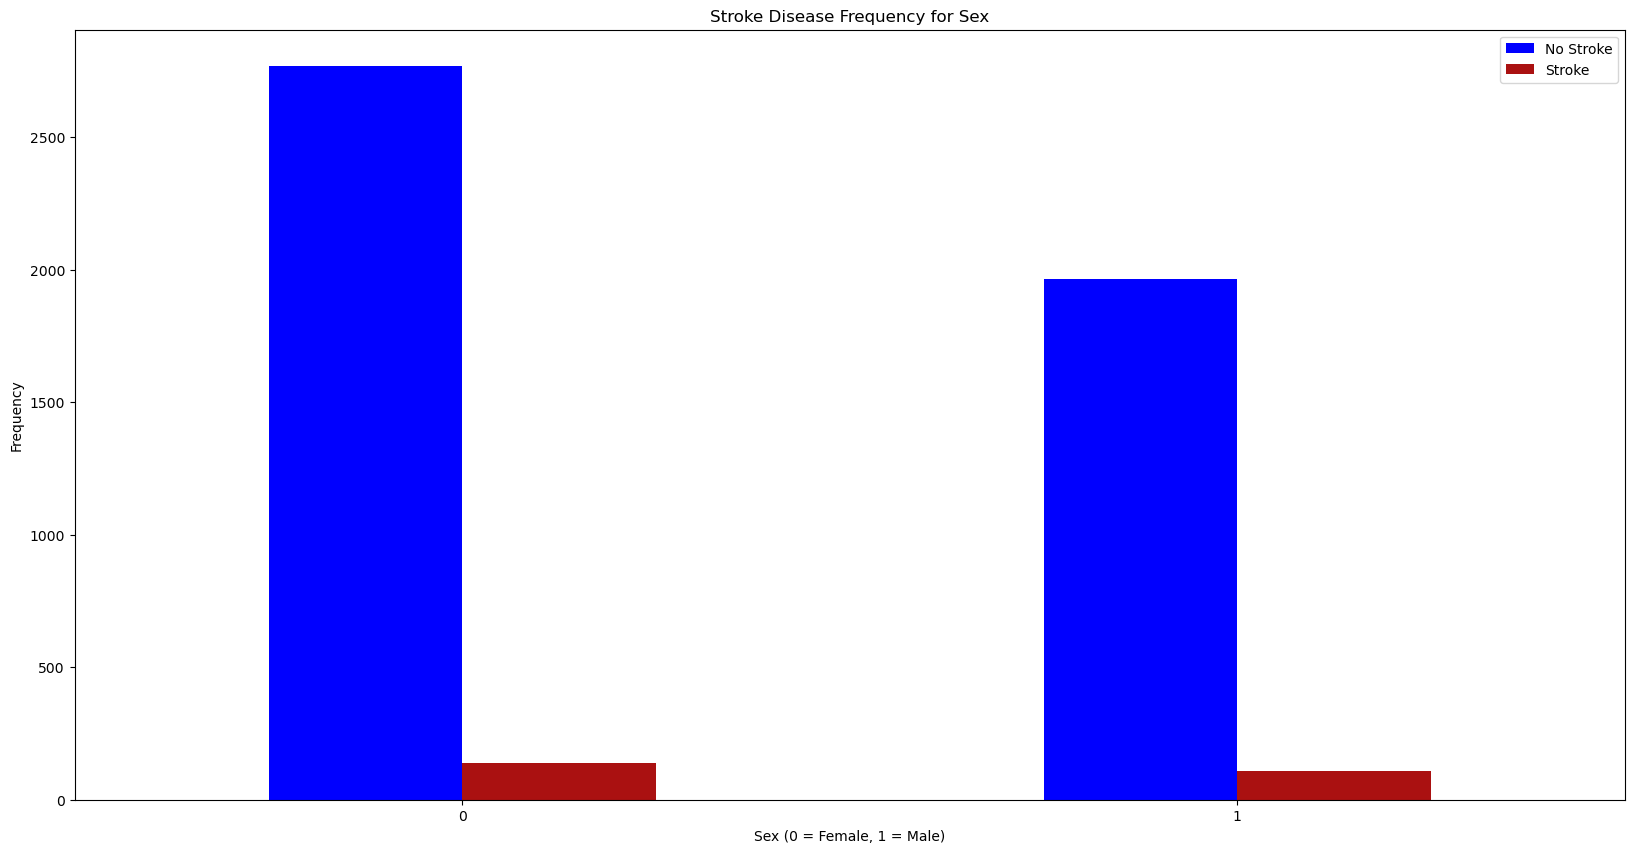

In [32]:
pd.crosstab(df.gender,df.stroke).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111','green','yellow','black' ])
plt.title('Stroke Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Stroke", "Stroke"])
plt.ylabel('Frequency')
plt.show()

In [33]:
df["Residence_type"].unique()

array([1, 0])

In [34]:
predictors = df.drop("stroke",axis=1)
target = df["stroke"]


In [35]:
target.value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [36]:
from imblearn.over_sampling import SMOTE 

In [37]:
print("Before OverSampling, counts of label '0': {}".format(sum(target == 0))) 
print("Before OverSampling, counts of label '1': {}".format(sum(target == 1))) 

  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 

sm = SMOTE(random_state = 42) 
predictors_res, target_res = sm.fit_resample(predictors,target.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(predictors_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(target_res.shape)) 
  
print("After OverSampling, counts of label '0': {}".format(sum(target_res == 0))) 
print("After OverSampling, counts of label '1': {}".format(sum(target_res == 1))) 


Before OverSampling, counts of label '0': 4733
Before OverSampling, counts of label '1': 248
After OverSampling, the shape of train_X: (9466, 10)
After OverSampling, the shape of train_y: (9466,) 

After OverSampling, counts of label '0': 4733
After OverSampling, counts of label '1': 4733


In [38]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(predictors_res,target_res,stratify=target_res,random_state = 42)

In [47]:
X_test.to_csv(r"C:\Users\ST-0008\Desktop\test.csv")

In [48]:
target_res.shape

(9466,)

In [49]:
predictors_res.shape

(9466, 10)

In [50]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(7099, 10) (2367, 10) (7099,) (2367,)


In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

C:\Users\ST-0008\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC on Test data is 0.8094634558512885
AUC on Train data is 0.8108184251303
---------------------------


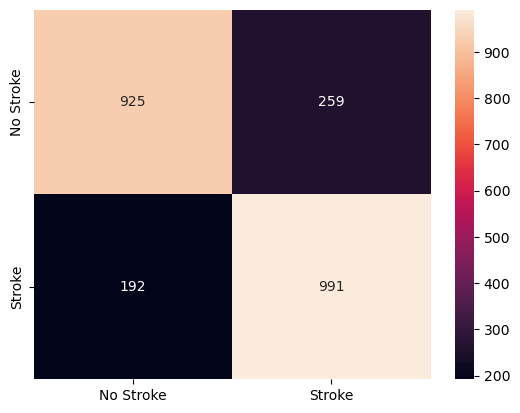

In [52]:
from sklearn.linear_model import LogisticRegression 
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

import pickle
filename = r'C:\Users\ST-0008\Desktop\LR_stroke.pkl'
pickle.dump(log_model, open(filename, 'wb'))


pred_test1 =log_model.predict(X_test)
test_accuracy1 = accuracy_score(y_test, pred_test1)
pred_train = log_model.predict(X_train)
train_accuracy1 =accuracy_score(y_train,pred_train)

print("AUC on Test data is " +str(accuracy_score(y_test,pred_test1)))
print("AUC on Train data is " +str(accuracy_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names =['No Stroke','Stroke']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test1.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [53]:
results = pd.DataFrame(columns=['model', 'Classifier' , 'Train-Accuracy', 'Test-Accuracy' ])
new = ['LR','Logisticregression',0.794,0.801]
results.loc[0] = new

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]

param_grid={'n_estimators':n_estimators , 'max_depth':dept}
RF = RandomForestClassifier()
model = GridSearchCV(RF,param_grid,scoring='accuracy',n_jobs=-1,cv=3)
model.fit(X_train,y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal n_estimators 60
optimal max_depth 500


In [55]:
optimal_n_estimators = model.best_estimator_.n_estimators
optimal_max_depth = model.best_estimator_.max_depth

AUC on Test data is 0.9383185466835657
AUC on Train data is 1.0
---------------------------


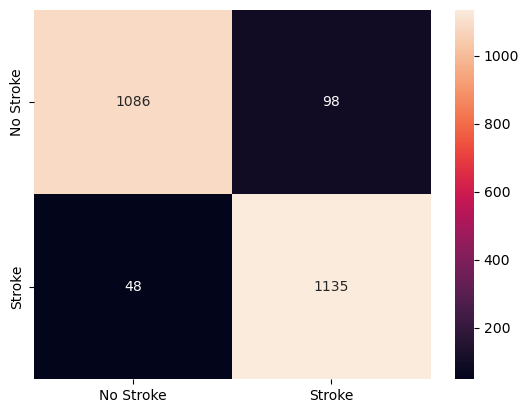

In [56]:
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(max_depth = optimal_max_depth,n_estimators = optimal_n_estimators)
clf.fit(X_train,y_train)

import pickle
filename = r'C:\Users\ST-0008\Desktop\rf_stroke.pkl'
pickle.dump(clf, open(filename, 'wb'))


pred_test3 =clf.predict(X_test)
test_accuracy3 = accuracy_score(y_test, pred_test3)
pred_train = clf.predict(X_train)
train_accuracy3 =accuracy_score(y_train,pred_train)

print("AUC on Test data is " +str(accuracy_score(y_test,pred_test3)))
print("AUC on Train data is " +str(accuracy_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names =['No Stroke','Stroke']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test3.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [57]:
new = ['RF','RandomForestClassifier',1.0,0.947]
results.loc[1] = new

In [58]:
results

,model,Classifier,Train-Accuracy,Test-Accuracy
0,LR,Logisticregression,0.794,0.801
1,RF,RandomForestClassifier,1.000,0.947


C:\Users\ST-0008\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ST-0008\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:50:13] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC on Test data is 0.959864807773553
AUC on Train data is 0.9963375123256797
---------------------------


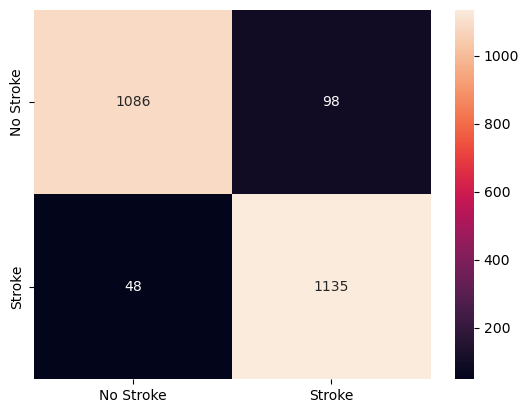

In [59]:
import xgboost as xgb
#import lightgbm as lgb
from sklearn.metrics import accuracy_score

model = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.04,random_state=1)
model.fit(X_train, y_train)

import pickle
filename = r'C:\Users\ST-0008\Desktop\X_gb_stroke.pkl'
pickle.dump(model, open(filename, 'wb'))


pred_test4 =model.predict(X_test)
test_accuracy4 = accuracy_score(y_test, pred_test4)
pred_train = model.predict(X_train)
train_accuracy4 =accuracy_score(y_train,pred_train)


print("AUC on Test data is " +str(accuracy_score(y_test,pred_test4)))
print("AUC on Train data is " +str(accuracy_score(y_train,pred_train)))

print("---------------------------")
# Code for drawing seaborn heatmaps
class_names =['No Stroke','Stroke']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test3.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np

from keras.models import Sequential
from keras.layers import LSTM
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPool1D, Dropout,LSTM, Input
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
from time import time
from keras.layers import LeakyReLU, PReLU
import tensorflow as tf
from tensorflow.python.client import device_lib
from sklearn.preprocessing import StandardScaler


In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(X_train)
x_test=scaler.transform(X_test)

In [61]:
pd.DataFrame(X_test).to_csv(r"C:\Users\ST-0008\Desktop\new_test_data.csv")

In [65]:
from tensorflow.keras.layers import Flatten

In [68]:
model = Sequential()
model.add(Input(shape=(10,1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(16,return_sequences=True))
model.add(LSTM(8))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
History_1 = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10, batch_size=128, verbose=2)

Epoch 1/10
56/56 - 8s - loss: 0.6259 - accuracy: 0.6571 - val_loss: 0.4555 - val_accuracy: 0.7947 - 8s/epoch - 149ms/step
Epoch 2/10
56/56 - 1s - loss: 0.4452 - accuracy: 0.7890 - val_loss: 0.4211 - val_accuracy: 0.8010 - 741ms/epoch - 13ms/step
Epoch 3/10
56/56 - 1s - loss: 0.4211 - accuracy: 0.8022 - val_loss: 0.4069 - val_accuracy: 0.8074 - 721ms/epoch - 13ms/step
Epoch 4/10
56/56 - 1s - loss: 0.4157 - accuracy: 0.8101 - val_loss: 0.4025 - val_accuracy: 0.8116 - 735ms/epoch - 13ms/step
Epoch 5/10
56/56 - 1s - loss: 0.4095 - accuracy: 0.8131 - val_loss: 0.4013 - val_accuracy: 0.8179 - 716ms/epoch - 13ms/step
Epoch 6/10
56/56 - 1s - loss: 0.4065 - accuracy: 0.8153 - val_loss: 0.3981 - val_accuracy: 0.8145 - 702ms/epoch - 13ms/step
Epoch 7/10
56/56 - 1s - loss: 0.4109 - accuracy: 0.8125 - val_loss: 0.3974 - val_accuracy: 0.8166 - 690ms/epoch - 12ms/step
Epoch 8/10
56/56 - 1s - loss: 0.4162 - accuracy: 0.8080 - val_loss: 0.4103 - val_accuracy: 0.8128 - 729ms/epoch - 13ms/step
Epoch 9/10

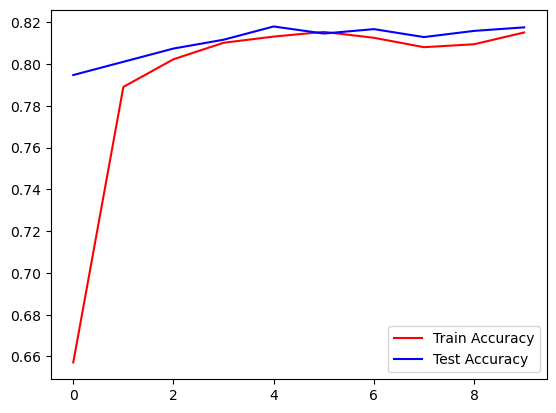

In [70]:
# plot the accuracy plot
plt.plot(History_1.history['accuracy'], 'r')
plt.plot(History_1.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

In [71]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, dpi=70)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [85]:
model1 = Sequential()

model1.add(Conv1D(256, 3, activation='relu', input_shape=(10,1),  padding='same'))
model1.add(MaxPool1D(2))
model1.add(Dropout(0.2))
model1.add(Conv1D(256, 3, activation='relu', input_shape=(10,1),  padding='same'))
model1.add(MaxPool1D(2))
model1.add(Dropout(0.2))
model1.add(Conv1D(256, 3, activation='relu', input_shape=(10,1),  padding='same'))
model1.add(MaxPool1D(2))
model1.add(Dropout(0.2))
model1.add(Dense(250, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [86]:
model1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 10, 256)           1024      
                                                                 
 max_pooling1d_20 (MaxPooli  (None, 5, 256)            0         
 ng1D)                                                           
                                                                 
 dropout_17 (Dropout)        (None, 5, 256)            0         
                                                                 
 conv1d_21 (Conv1D)          (None, 5, 256)            196864    
                                                                 
 max_pooling1d_21 (MaxPooli  (None, 2, 256)            0         
 ng1D)                                                           
                                                                 
 dropout_18 (Dropout)        (None, 2, 256)           

In [80]:
train = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=20, batch_size=128, verbose=2)

Epoch 1/20
56/56 - 1s - loss: 0.3963 - accuracy: 0.8172 - val_loss: 0.3936 - val_accuracy: 0.8213 - 759ms/epoch - 14ms/step
Epoch 2/20
56/56 - 1s - loss: 0.3962 - accuracy: 0.8181 - val_loss: 0.3856 - val_accuracy: 0.8200 - 714ms/epoch - 13ms/step
Epoch 3/20
56/56 - 1s - loss: 0.3963 - accuracy: 0.8169 - val_loss: 0.3857 - val_accuracy: 0.8264 - 692ms/epoch - 12ms/step
Epoch 4/20
56/56 - 1s - loss: 0.3940 - accuracy: 0.8194 - val_loss: 0.3862 - val_accuracy: 0.8221 - 712ms/epoch - 13ms/step
Epoch 5/20
56/56 - 1s - loss: 0.3944 - accuracy: 0.8152 - val_loss: 0.3996 - val_accuracy: 0.8078 - 705ms/epoch - 13ms/step
Epoch 6/20
56/56 - 1s - loss: 0.3960 - accuracy: 0.8166 - val_loss: 0.3857 - val_accuracy: 0.8285 - 688ms/epoch - 12ms/step
Epoch 7/20
56/56 - 1s - loss: 0.3922 - accuracy: 0.8211 - val_loss: 0.3882 - val_accuracy: 0.8234 - 707ms/epoch - 13ms/step
Epoch 8/20
56/56 - 1s - loss: 0.3907 - accuracy: 0.8208 - val_loss: 0.3884 - val_accuracy: 0.8158 - 692ms/epoch - 12ms/step
Epoch 9/

In [76]:
model.evaluate(x_test, y_test)

74/74 [==============================] - 0s 4ms/step - loss: 0.3868 - accuracy: 0.8183


[0.38680317997932434, 0.8183354735374451]

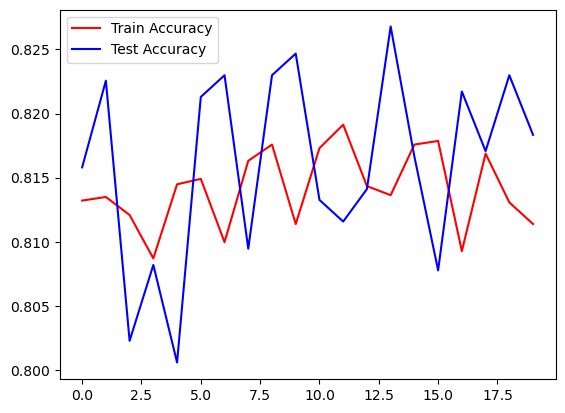

In [77]:
# plot the accuracy plot
plt.plot(train.history['accuracy'], 'r')
plt.plot(train.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()